In [2]:
# Importar librerías
import yfinance as yf
import pandas as pd

# Descargar datos de Tesla (Ticker: TSLA)
tesla = yf.Ticker("TSLA")

# Obtener precios históricos
tesla_data = tesla.history(period="max")

# Mostrar las primeras filas
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [4]:
# Descargar datos de GameStop (Ticker: GME)
gme = yf.Ticker("GME")

# Obtener precios históricos
gme_data = gme.history(period="max")

# Mostrar las primeras filas
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de GameStop Revenue en Macrotrends
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Simular navegador
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url_gme, headers=headers)

# Analizar el contenido HTML
soup = BeautifulSoup(response.text, "html.parser")

# Buscar todas las tablas
tables = soup.find_all("table", {"class": "historical_data_table table"})

gme_revenue = None

# Buscar la tabla correcta
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        gme_revenue = pd.read_html(str(table))[0]
        break

# Si no se encontró con ese texto, usar la primera tabla como respaldo
if gme_revenue is None and len(tables) > 0:
    gme_revenue = pd.read_html(str(tables[0]))[0]

# Limpiar los datos
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({'\$': '', ',': ''}, regex=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

# Mostrar resultado
gme_revenue.head()

C:\Users\Carla\AppData\Local\Temp\ipykernel_16652\2937947071.py:23: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(table))[0]


,Date,Revenue
0,2025-07-31,972
1,2025-04-30,732
2,2025-01-31,1283
3,2024-10-31,860
4,2024-07-31,798


In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Simular navegador
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

# Analizar el contenido HTML
soup = BeautifulSoup(response.text, "html.parser")

# Buscar todas las tablas
tables = soup.find_all("table", {"class": "historical_data_table table"})
tesla_revenue = None
# Si no se encontró con ese texto, usar la primera tabla como respaldo
if tesla_revenue is None and len(tables) > 0:
    tesla_revenue = pd.read_html(str(tables[0]))[0]
# Limpiar los datos
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace({'\$': '', ',': ''}, regex=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
# Mostrar resultado
tesla_revenue.head()

C:\Users\Carla\AppData\Local\Temp\ipykernel_16652\2954961516.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tables[0]))[0]


,Date,Revenue
0,2024,97690
1,2023,96773
2,2022,81462
3,2021,53823
4,2020,31536


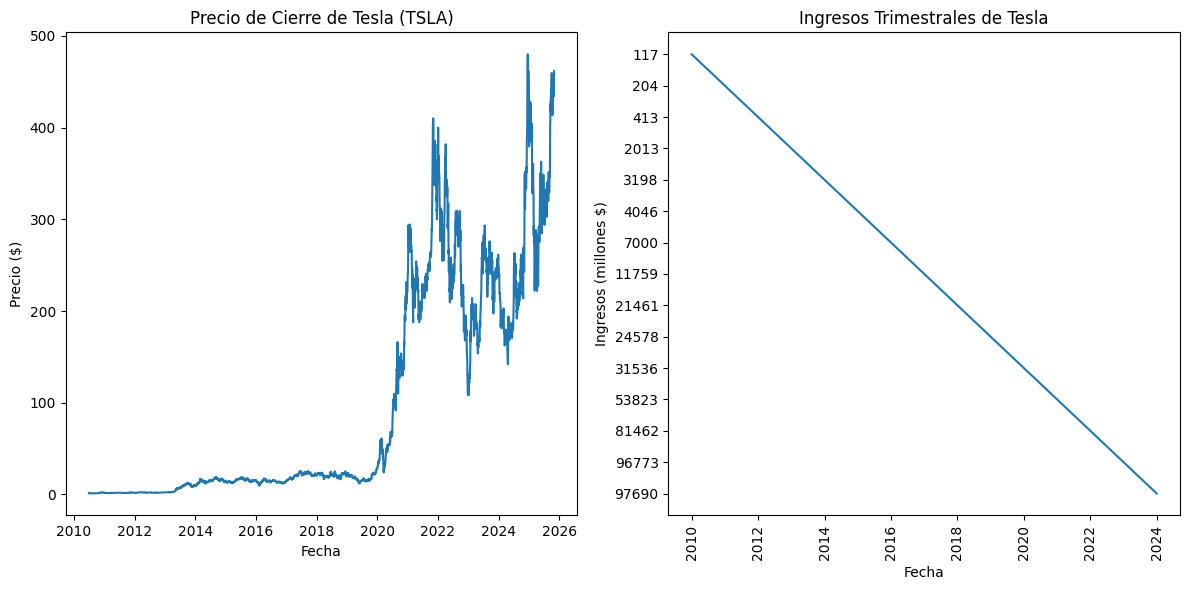

In [22]:
import matplotlib.pyplot as plt
# Crear figura
plt.figure(figsize=(12,6))
# Subplot 1: Precio de acciones
plt.subplot(1, 2, 1)
plt.plot(tesla_data.index, tesla_data["Close"])
plt.title("Precio de Cierre de Tesla (TSLA)")
plt.xlabel("Fecha")
plt.ylabel("Precio ($)")
# Subplot 2: Ingresos trimestrales
plt.subplot(1, 2, 2)
plt.plot(tesla_revenue["Date"], tesla_revenue["Revenue"])
plt.title("Ingresos Trimestrales de Tesla")
plt.xticks(rotation=90)
plt.xlabel("Fecha")
plt.ylabel("Ingresos (millones $)")
plt.tight_layout()
plt.show()

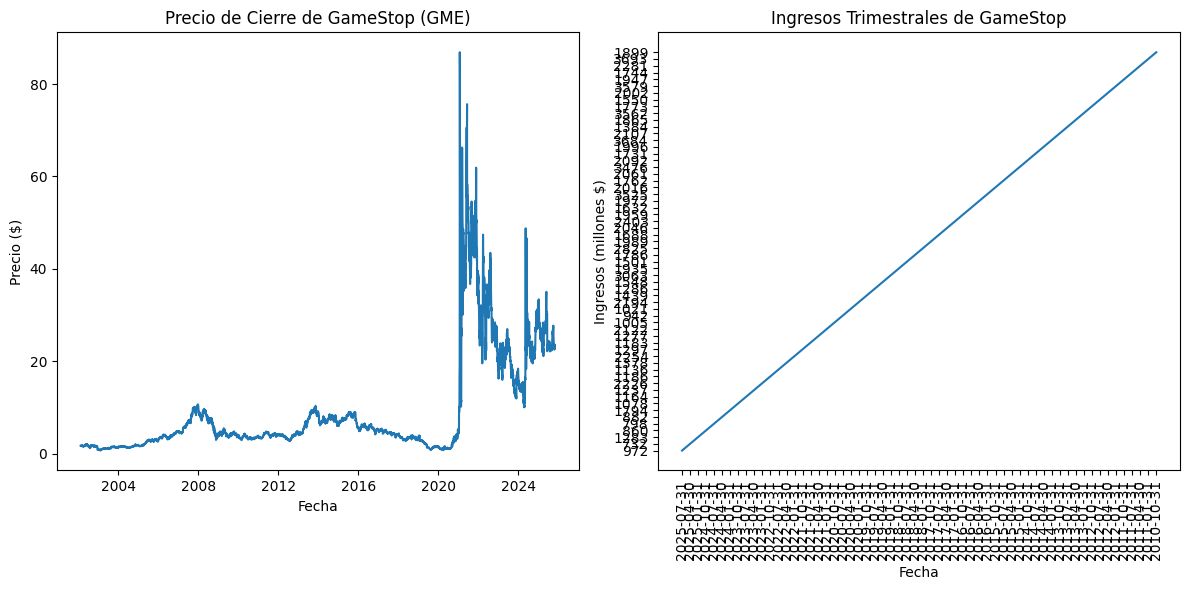

In [23]:
plt.figure(figsize=(12,6))
# Subplot 1: Precio de acciones
plt.subplot(1, 2, 1)
plt.plot(gme_data.index, gme_data["Close"])
plt.title("Precio de Cierre de GameStop (GME)")
plt.xlabel("Fecha")
plt.ylabel("Precio ($)")
# Subplot 2: Ingresos trimestrales
plt.subplot(1, 2, 2)
plt.plot(gme_revenue["Date"], gme_revenue["Revenue"])
plt.title("Ingresos Trimestrales de GameStop")
plt.xticks(rotation=90)
plt.xlabel("Fecha")
plt.ylabel("Ingresos (millones $)")
plt.tight_layout()
plt.show()